## <span style="color:orange">Techniques: </span>
- Decision tree
- Random Forest tree
- Gaussian Naive Bayes
- Logistic Regression

### <span style="color:purple">Dataset: **Heart Failure Prediction !**</span>

### <span style="color:red">Problem: **Classification**</span>

### <span style="color:cyan">Step: 01</span>: (Import Dataset)

In [1]:
# import Dataset !
import pandas as pd

df = pd.read_csv('heart_failure.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


 ### Missing Values

In [2]:
for feature in df:
    if df[feature].isnull().sum()>1:
        print(feature,":", np.round(df[feature].isnull().mean(),4),'%')
    
else:
     print("There is no Null Values")

There is no Null Values


In [3]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

 ### Numerical Features

In [4]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print("The length of Numerical_values is :",len(numerical_features))
df[numerical_features].head()

The length of Numerical_values is : 13


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


 ### Discrete Variable 

In [5]:
discrete_Feature = [feature for feature in numerical_features if len(df[feature].unique())<25]

print("The Discrete feature is :",len(discrete_Feature))
discrete_Feature

The Discrete feature is : 7


['anaemia',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'sex',
 'smoking',
 'DEATH_EVENT']

 ### Continous Variable

In [6]:
continous_Feature = [feature for feature in numerical_features if feature not in discrete_Feature ]

print("The Continous feature is :",len(continous_Feature))
continous_Feature

The Continous feature is : 6


['age',
 'creatinine_phosphokinase',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'time']

In [7]:
df[continous_Feature].head()

,age,creatinine_phosphokinase,platelets,serum_creatinine,serum_sodium,time
0,75.0,582,265000.00,1.9,130,4
1,55.0,7861,263358.03,1.1,136,6
2,65.0,146,162000.00,1.3,129,7
3,50.0,111,210000.00,1.9,137,7
4,65.0,160,327000.00,2.7,116,8


 ### Categorical feature

In [8]:
categorical_feature = [feature for feature in df.columns if df[feature].dtypes =="O"]
print(len(categorical_feature))
categorical_feature

0


[]

In [9]:
df[categorical_feature].head()

""
0
1
2
3
4


In [10]:
X = df.drop('DEATH_EVENT', axis=1)
y = df[['DEATH_EVENT']]

In [11]:
X.head(2)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6


In [12]:
y.head(2)

,DEATH_EVENT
0,1
1,1


In [13]:
y['DEATH_EVENT'].unique()

array([1, 0], dtype=int64)

### <span style="color:cyan">Step: 02</span>: Data Normalize

In [14]:
# transformation !
from sklearn.preprocessing import MinMaxScaler

feature = X.columns
scaling = MinMaxScaler()
df[feature] = scaling.fit_transform(df[feature])
X = df[feature]
X.head(3)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,0.000000
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,0.007117
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,0.010676


### <span style="color:cyan">Step: 03</span>: Data Cleaned or Organize

In [15]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [16]:
# plots !
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
print("Before Cleaning:", df.shape)

Before Cleaning: (299, 13)


***

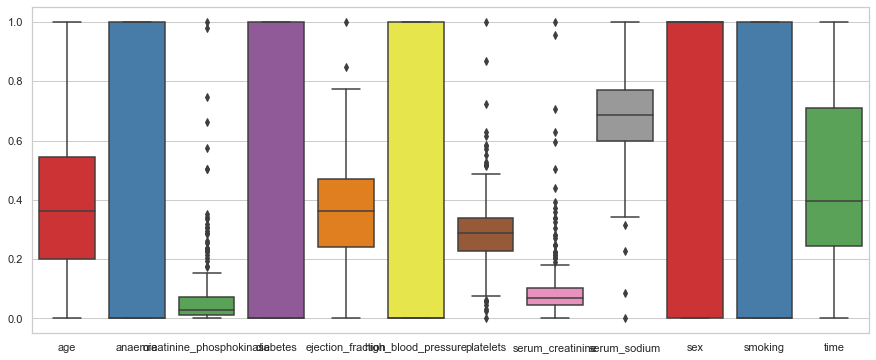

In [18]:
plt.figure(figsize=(15,6))
sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=X,
            palette="Set1")
plt.show()            

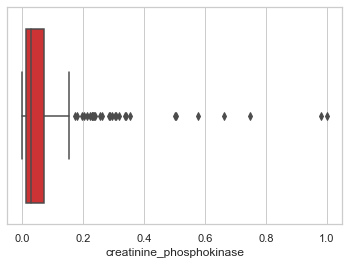

In [19]:
# creatinine_phosphokinase                     

sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            x="creatinine_phosphokinase",
            palette="Set1")
plt.show()            

In [20]:
df = df[df['creatinine_phosphokinase']<0.16] 


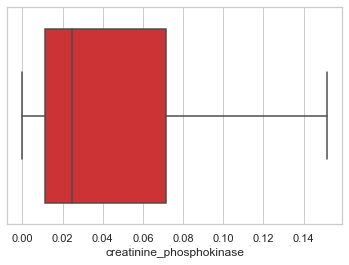

In [21]:
# creatinine_phosphokinase

sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            x="creatinine_phosphokinase",
            palette="Set1")
plt.show()            

In [22]:
df.shape

(270, 13)

***

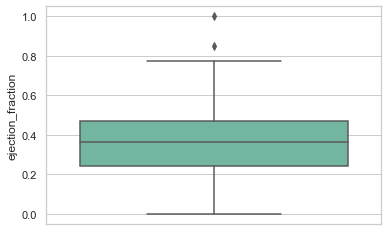

In [23]:
# ejection_fraction

sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            y="ejection_fraction",
            palette="Set2")
plt.show()            

In [24]:
df = df[df['ejection_fraction']<0.81] 


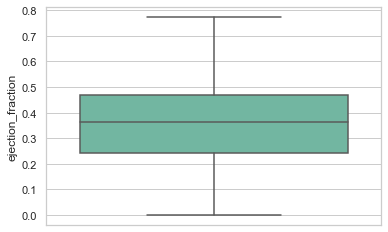

In [25]:
# ejection_fraction

sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            y="ejection_fraction",
            palette="Set2")
plt.show()            

In [26]:
df.shape

(268, 13)

***

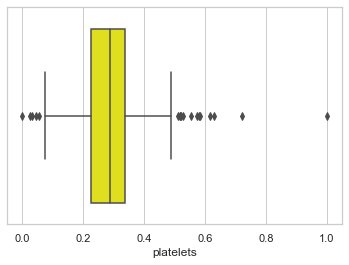

In [27]:
# platelets

sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            x="platelets",
            color="yellow")
plt.show()            

In [28]:
df = df[df['platelets']<0.45]
df = df[df['platelets']>0.1]

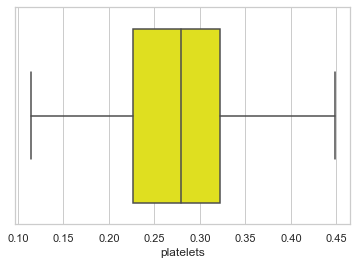

In [29]:
# platelets

sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            x="platelets",
            color="yellow")
plt.show()            

In [30]:
df.shape

(244, 13)

***

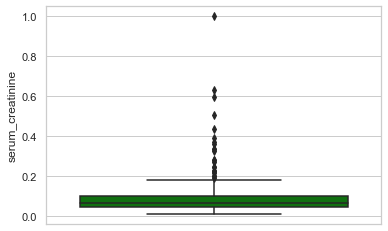

In [31]:
# serum_creatinine   

sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            y="serum_creatinine",
            color="green")
plt.show()            

In [32]:
df = df[df['serum_creatinine']<0.13]

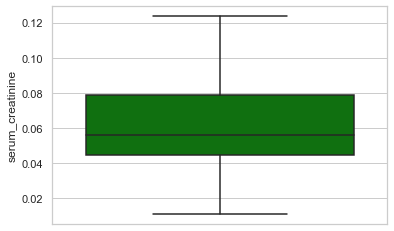

In [33]:
# serum_creatinine

sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            y="serum_creatinine",
            color="green")
plt.show()            

In [34]:
df.shape

(195, 13)

***

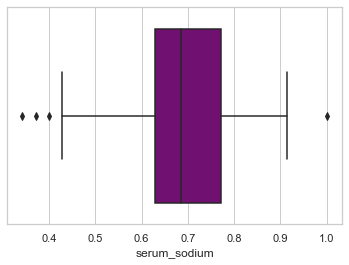

In [35]:
# serum_sodium

sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            x="serum_sodium",
            color="purple")
plt.show()            

In [36]:
df = df[df['serum_sodium']>0.4]
df = df[df['serum_sodium']<0.99]


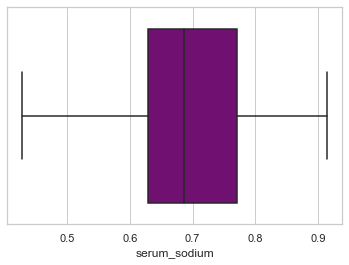

In [37]:
# serum_sodium

sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            x="serum_sodium",
            color="purple")
plt.show()            

In [38]:
print("After Cleaning:", df.shape)

After Cleaning: (191, 13)


***

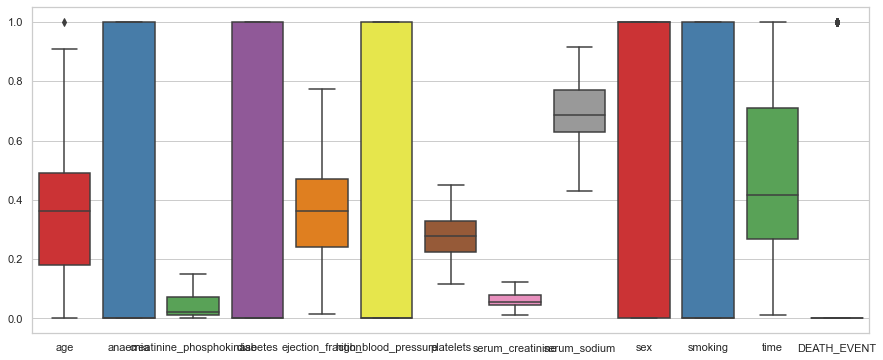

In [39]:
plt.figure(figsize=(15,6))
sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            palette="Set1")
plt.show()            

***

 ## **Model Building**

### <span style="color:cyan">Step: 04</span>: Splitting Dataset into (Training and Testing) Data 

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

***

### <span style="color:cyan">Step: 05</span>: Techniques !

## Decision tree Technique !

In [41]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier().fit(X_train, y_train)
dt_model


DecisionTreeClassifier()

### Evaluate or Test Model Accuracy

In [42]:
predicted_values = dt_model.predict(X_test)
predicted_values

from sklearn.metrics import accuracy_score

import numpy as np

dt_score = np.round(accuracy_score(y_test, predicted_values)*100, 2)
print("Decision tree:",dt_score)


Decision tree: 76.67


***

***

## Random Forest tree !

In [43]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier().fit(X_train, y_train)
rf_model


C:\Users\fahad\AppData\Local\Temp\ipykernel_11532\4111477682.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model = RandomForestClassifier().fit(X_train, y_train)


RandomForestClassifier()

### Evaluate or Test Model Accuracy

In [44]:
predicted_values = rf_model.predict(X_test)
predicted_values

from sklearn.metrics import accuracy_score

import numpy as np

rf_score = np.round(accuracy_score(y_test, predicted_values)*100, 2)
print("Random Forest:", rf_score)


Random Forest: 85.0


***

***

## Gaussian Naive Bayes !

In [45]:
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB().fit(X_train, y_train)
gnb_model


C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

### Evaluate or Test Model Accuracy

In [46]:
predicted_values = gnb_model.predict(X_test)
predicted_values

from sklearn.metrics import accuracy_score

import numpy as np

gnb_score = np.round(accuracy_score(y_test, predicted_values)*100, 2)
print("GaussianNB:", gnb_score)


GaussianNB: 68.33


## Logistic Regression !

In [47]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression().fit(X_train, y_train)
lr_model


C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

### Evaluate or Test Model Accuracy

In [48]:
lr_score = np.round(lr_model.score(X_test, y_test)*100, 2)
print("Logistic Regression:", lr_score)


Logistic Regression: 80.0


***

***

## Predict Results Score

###  Compare the Results of Models

In [49]:
data={'Decesion Tree'            :[dt_score],
      'Random Forest'            :[rf_score],
      'Gaussian Naive Bayes'     :[gnb_score],
      'Logistic Regression'      :[lr_score]
}

In [50]:
Evaluation =pd.DataFrame(data, index=['SCORE'])
Evaluation

,Decesion Tree,Random Forest,Gaussian Naive Bayes,Logistic Regression
SCORE,76.67,85.0,68.33,80.0


***